In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = "https://www.kaggle.com/datasets/nikhil1e9/loan-default/download?datasetVersionNumber=2"

In [3]:
# !wget $data

In [4]:
df = pd.read_csv("Loan_default.csv")

In [5]:
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [6]:
df.shape

(255347, 18)

In [7]:
df.columns

Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner',
       'Default'],
      dtype='object')

In [8]:
df.dtypes

LoanID             object
Age                 int64
Income              int64
LoanAmount          int64
CreditScore         int64
MonthsEmployed      int64
NumCreditLines      int64
InterestRate      float64
LoanTerm            int64
DTIRatio          float64
Education          object
EmploymentType     object
MaritalStatus      object
HasMortgage        object
HasDependents      object
LoanPurpose        object
HasCoSigner        object
Default             int64
dtype: object

In [9]:
import re

columns = []
for col in df.columns:
    col = re.sub(r'(?<!^)(?=[A-Z])', '_', col).lower()
    columns.append(col)

In [10]:
columns

['loan_i_d',
 'age',
 'income',
 'loan_amount',
 'credit_score',
 'months_employed',
 'num_credit_lines',
 'interest_rate',
 'loan_term',
 'd_t_i_ratio',
 'education',
 'employment_type',
 'marital_status',
 'has_mortgage',
 'has_dependents',
 'loan_purpose',
 'has_co_signer',
 'default']

In [11]:
df.columns = columns

In [12]:
df

,loan_i_d,age,income,loan_amount,credit_score,months_employed,num_credit_lines,interest_rate,loan_term,d_t_i_ratio,education,employment_type,marital_status,has_mortgage,has_dependents,loan_purpose,has_co_signer,default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,8C6S86ESGC,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No,0
255343,98R4KDHNND,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,Home,No,1
255344,XQK1UUUNGP,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes,0
255345,JAO28CPL4H,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,Other,No,0


In [13]:
df.columns

Index(['loan_i_d', 'age', 'income', 'loan_amount', 'credit_score',
       'months_employed', 'num_credit_lines', 'interest_rate', 'loan_term',
       'd_t_i_ratio', 'education', 'employment_type', 'marital_status',
       'has_mortgage', 'has_dependents', 'loan_purpose', 'has_co_signer',
       'default'],
      dtype='object')

In [14]:
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

In [15]:
for col in categorical_columns:
    df[col] = df[col].str.lower().str.replace(' ','_')

In [16]:
df.head()

,loan_i_d,age,income,loan_amount,credit_score,months_employed,num_credit_lines,interest_rate,loan_term,d_t_i_ratio,education,employment_type,marital_status,has_mortgage,has_dependents,loan_purpose,has_co_signer,default
0,i38pquqs96,56,85994,50587,520,80,4,15.23,36,0.44,bachelor's,full-time,divorced,yes,yes,other,yes,0
1,hpsk72wa7r,69,50432,124440,458,15,1,4.81,60,0.68,master's,full-time,married,no,no,other,yes,0
2,c1oz6dpj8y,46,84208,129188,451,26,3,21.17,24,0.31,master's,unemployed,divorced,yes,yes,auto,no,1
3,v2kksfm3un,32,31713,44799,743,0,3,7.07,24,0.23,high_school,full-time,married,no,no,business,no,0
4,ey08jdhtzp,60,20437,9139,633,8,4,6.51,48,0.73,bachelor's,unemployed,divorced,no,yes,auto,no,0


In [17]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print()

loan_i_d
['i38pquqs96' 'hpsk72wa7r' 'c1oz6dpj8y' 'v2kksfm3un' 'ey08jdhtzp']

age
[56 69 46 32 60]

income
[85994 50432 84208 31713 20437]

loan_amount
[ 50587 124440 129188  44799   9139]

credit_score
[520 458 451 743 633]

months_employed
[80 15 26  0  8]

num_credit_lines
[4 1 3 2]

interest_rate
[15.23  4.81 21.17  7.07  6.51]

loan_term
[36 60 24 48 12]

d_t_i_ratio
[0.44 0.68 0.31 0.23 0.73]

education
["bachelor's" "master's" 'high_school' 'phd']

employment_type
['full-time' 'unemployed' 'self-employed' 'part-time']

marital_status
['divorced' 'married' 'single']

has_mortgage
['yes' 'no']

has_dependents
['yes' 'no']

loan_purpose
['other' 'auto' 'business' 'home' 'education']

has_co_signer
['yes' 'no']

default
[0 1]



### Setting up validation framework

In [18]:
from sklearn.model_selection import train_test_split 

In [19]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=11)

In [20]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)

In [21]:
len(df_full_train)

204277

In [22]:
len(df_train), len(df_val), len(df_test)

(153207, 51070, 51070)

In [23]:
df_full_train

,loan_i_d,age,income,loan_amount,credit_score,months_employed,num_credit_lines,interest_rate,loan_term,d_t_i_ratio,education,employment_type,marital_status,has_mortgage,has_dependents,loan_purpose,has_co_signer,default
248506,wcuxctelw9,23,112090,226382,819,118,2,21.84,60,0.19,high_school,full-time,married,no,no,education,no,0
238372,94n98t1vw2,66,44326,187964,469,41,4,9.63,36,0.40,master's,full-time,married,no,no,other,no,1
18711,by37mlske8,21,55910,68458,481,97,4,23.12,24,0.85,phd,part-time,divorced,yes,yes,education,yes,0
36266,7ayc61vaea,69,132035,59515,403,19,1,4.05,12,0.70,phd,full-time,divorced,yes,no,business,yes,0
67102,zz4l742kwo,26,22977,124181,378,9,3,7.79,12,0.34,high_school,part-time,single,no,no,business,yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97617,wmfqjx131t,21,103895,62730,737,25,1,15.38,12,0.75,phd,self-employed,single,no,no,other,no,0
203867,2eqz2ntfyp,31,33566,16651,343,85,1,14.42,48,0.22,high_school,part-time,divorced,yes,yes,education,no,0
21584,we8iylezki,58,97151,113850,423,46,4,18.11,24,0.69,master's,full-time,married,no,yes,other,yes,0
36543,tpruni01fg,48,137505,213012,665,107,1,21.67,48,0.42,high_school,unemployed,divorced,yes,no,business,yes,0


In [24]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [25]:
y_train = df_train['default']
y_val = df_val['default']
y_test = df_test['default']

In [26]:
del df_train['default']
del df_val['default']
del df_test['default']

In [27]:
# Checking the default rate in our dataset
df_full_train.default.value_counts(normalize=True)

0    0.883976
1    0.116024
Name: default, dtype: float64

In [28]:
global_default_rate = df_full_train.default.mean()
global_default_rate

0.11602383038717036

In [29]:
df_full_train.dtypes[df_full_train.dtypes != 'object'].index

Index(['age', 'income', 'loan_amount', 'credit_score', 'months_employed',
       'num_credit_lines', 'interest_rate', 'loan_term', 'd_t_i_ratio',
       'default'],
      dtype='object')

In [30]:
df_full_train.dtypes[df_full_train.dtypes == 'object'].index

Index(['loan_i_d', 'education', 'employment_type', 'marital_status',
       'has_mortgage', 'has_dependents', 'loan_purpose', 'has_co_signer'],
      dtype='object')

In [31]:
numerical = ['age', 'income', 'loan_amount', 'credit_score', 'months_employed',
       'num_credit_lines', 'loan_term']

In [32]:
categorical = ['education', 'employment_type', 'marital_status',
       'has_mortgage', 'has_dependents', 'loan_purpose', 'has_co_signer']

In [33]:
df_full_train[categorical].nunique()

education          4
employment_type    4
marital_status     3
has_mortgage       2
has_dependents     2
loan_purpose       5
has_co_signer      2
dtype: int64

In [34]:
df_full_train.head()

,loan_i_d,age,income,loan_amount,credit_score,months_employed,num_credit_lines,interest_rate,loan_term,d_t_i_ratio,education,employment_type,marital_status,has_mortgage,has_dependents,loan_purpose,has_co_signer,default
248506,wcuxctelw9,23,112090,226382,819,118,2,21.84,60,0.19,high_school,full-time,married,no,no,education,no,0
238372,94n98t1vw2,66,44326,187964,469,41,4,9.63,36,0.40,master's,full-time,married,no,no,other,no,1
18711,by37mlske8,21,55910,68458,481,97,4,23.12,24,0.85,phd,part-time,divorced,yes,yes,education,yes,0
36266,7ayc61vaea,69,132035,59515,403,19,1,4.05,12,0.70,phd,full-time,divorced,yes,no,business,yes,0
67102,zz4l742kwo,26,22977,124181,378,9,3,7.79,12,0.34,high_school,part-time,single,no,no,business,yes,1


In [35]:
df_full_train['education'].unique()

array(['high_school', "master's", 'phd', "bachelor's"], dtype=object)

In [36]:
df_full_train[df_full_train['education'] == 'high_school'].default.mean()

0.12775957562992432

In [37]:
df_full_train[df_full_train['education'] == 'master\'s'].default.mean()

0.1075870523797283

In [38]:
df_full_train['employment_type'].unique()

array(['full-time', 'part-time', 'unemployed', 'self-employed'],
      dtype=object)

In [39]:
df_full_train[df_full_train['employment_type'] == 'self-employed'].default.mean()

0.11373049366964373

In [40]:
from IPython.display import display
for c in categorical:
    df_group = df_full_train.groupby(c).default.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_default_rate
    df_group['risk'] = df_group['mean'] / global_default_rate
    display(df_group)
    print()
    print()

,mean,count,diff,risk
education,,,,
bachelor's,0.122106,51611,0.006082,1.052420
high_school,0.127760,51276,0.011736,1.101149
master's,0.107587,50573,-0.008437,0.927284
phd,0.106401,50817,-0.009622,0.917065


,mean,count,diff,risk
employment_type,,,,
full-time,0.094186,50942,-0.021838,0.811778
part-time,0.121101,51296,0.005077,1.043760
self-employed,0.113730,50945,-0.002293,0.980234
unemployed,0.134986,51094,0.018963,1.163438


,mean,count,diff,risk
marital_status,,,,
divorced,0.124987,68119,0.008963,1.077254
married,0.103322,68146,-0.012702,0.890526
single,0.119773,68012,0.003749,1.032314


,mean,count,diff,risk
has_mortgage,,,,
no,0.123637,102138,0.007613,1.065614
yes,0.108411,102139,-0.007613,0.934386


,mean,count,diff,risk
has_dependents,,,,
no,0.127242,101979,0.011218,1.096687
yes,0.104841,102298,-0.011183,0.903614


,mean,count,diff,risk
loan_purpose,,,,
auto,0.118593,40736,0.002569,1.022143
business,0.123086,40947,0.007062,1.060868
education,0.118489,40814,0.002465,1.021245
home,0.101738,41017,-0.014286,0.876874
other,0.118269,40763,0.002245,1.019351


,mean,count,diff,risk
has_co_signer,,,,
no,0.128446,102121,0.012422,1.107063
yes,0.103606,102156,-0.012418,0.892974


### Feature importance : Mutual information

In [41]:
from sklearn.metrics import mutual_info_score

In [42]:
mutual_info_score(df_full_train.age, df_full_train.default)

0.014567453151904695

In [43]:
def mutual_info_default_score(series):
    return mutual_info_score(series, df_full_train.default)

In [44]:
mi = df_full_train[categorical].apply(mutual_info_default_score)
mi.sort_values(ascending=False)

KeyboardInterrupt: 

### Correlation

In [ ]:
df_full_train[numerical].corrwith(df_full_train.default).sort_values(ascending=False)

loan_amount         0.087421
num_credit_lines    0.027760
loan_term           0.000696
credit_score       -0.033572
months_employed    -0.098085
income             -0.100608
age                -0.167589
dtype: float64

### One hot encoding

In [ ]:
from sklearn.feature_extraction import DictVectorizer

In [ ]:
train_dicts = df_train[categorical + numerical].to_dict(orient='records')

In [ ]:
train_dicts

[{'education': 'high_school',
  'employment_type': 'unemployed',
  'marital_status': 'single',
  'has_mortgage': 'yes',
  'has_dependents': 'yes',
  'loan_purpose': 'business',
  'has_co_signer': 'no',
  'age': 34,
  'income': 82419,
  'loan_amount': 172552,
  'credit_score': 846,
  'months_employed': 26,
  'num_credit_lines': 4,
  'loan_term': 12},
 {'education': 'phd',
  'employment_type': 'full-time',
  'marital_status': 'divorced',
  'has_mortgage': 'yes',
  'has_dependents': 'yes',
  'loan_purpose': 'business',
  'has_co_signer': 'yes',
  'age': 65,
  'income': 108998,
  'loan_amount': 176273,
  'credit_score': 673,
  'months_employed': 99,
  'num_credit_lines': 2,
  'loan_term': 12},
 {'education': "master's",
  'employment_type': 'full-time',
  'marital_status': 'single',
  'has_mortgage': 'no',
  'has_dependents': 'no',
  'loan_purpose': 'other',
  'has_co_signer': 'no',
  'age': 39,
  'income': 128441,
  'loan_amount': 116544,
  'credit_score': 673,
  'months_employed': 68,
  

In [ ]:
dv = DictVectorizer(sparse=False)

In [ ]:
dv.fit(train_dicts)

DictVectorizer(sparse=False)

In [ ]:
dv.get_feature_names_out()

array(['age', 'credit_score', "education=bachelor's",
       'education=high_school', "education=master's", 'education=phd',
       'employment_type=full-time', 'employment_type=part-time',
       'employment_type=self-employed', 'employment_type=unemployed',
       'has_co_signer=no', 'has_co_signer=yes', 'has_dependents=no',
       'has_dependents=yes', 'has_mortgage=no', 'has_mortgage=yes',
       'income', 'loan_amount', 'loan_purpose=auto',
       'loan_purpose=business', 'loan_purpose=education',
       'loan_purpose=home', 'loan_purpose=other', 'loan_term',
       'marital_status=divorced', 'marital_status=married',
       'marital_status=single', 'months_employed', 'num_credit_lines'],
      dtype=object)

In [ ]:
X_train = dv.transform(train_dicts)

In [ ]:
val_dicts = df_val[categorical + numerical].to_dict(orient='records')

In [ ]:
X_val = dv.transform(val_dicts)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

/home/singh/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
model.intercept_[0]

-8.266858419758832e-05

In [ ]:
model.coef_[0].round(3)

array([-0.035, -0.   ,  0.   ,  0.   , -0.   , -0.   , -0.   ,  0.   ,
       -0.   ,  0.   ,  0.   , -0.001,  0.   , -0.   ,  0.   , -0.   ,
       -0.   ,  0.   ,  0.   ,  0.   , -0.   , -0.   ,  0.   ,  0.002,
        0.   , -0.   ,  0.   , -0.009,  0.001])

In [ ]:
model.predict(X_train)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
model.predict_proba(X_train)

array([[0.8290945 , 0.1709055 ],
       [0.96884776, 0.03115224],
       [0.92801249, 0.07198751],
       ...,
       [0.90138706, 0.09861294],
       [0.90232716, 0.09767284],
       [0.94372839, 0.05627161]])

In [ ]:
y_pred = model.predict_proba(X_val)[:, 1]

In [ ]:
y_pred >= 0.5

array([False, False, False, ..., False, False, False])

In [ ]:
default_decision = (y_pred >= 0.5)

In [ ]:
decision = default_decision.astype(int)

In [ ]:
decision[1499]

1

In [ ]:
df_val[default_decision]

,loan_i_d,age,income,loan_amount,credit_score,months_employed,num_credit_lines,interest_rate,loan_term,d_t_i_ratio,education,employment_type,marital_status,has_mortgage,has_dependents,loan_purpose,has_co_signer
1499,pwxsx53fpi,19,16102,205502,443,7,3,17.42,60,0.70,master's,self-employed,single,no,yes,business,no
2423,ppkhe8muie,18,21700,236781,391,13,2,8.77,24,0.88,master's,part-time,single,yes,yes,education,no
25331,mwiqdvdh3q,21,23866,242849,554,2,1,4.48,60,0.78,master's,full-time,divorced,no,yes,business,yes
29773,enxpmc9xw2,22,15459,242038,429,9,2,7.36,36,0.18,bachelor's,unemployed,single,yes,yes,business,yes
33208,y6cm0e9dwu,18,20511,218155,306,18,1,11.10,36,0.31,high_school,unemployed,divorced,no,yes,home,no
43123,59c2dn3heb,18,24226,243861,480,7,1,2.74,60,0.43,bachelor's,self-employed,single,yes,yes,home,yes
46267,96vjo1ma5x,18,22278,247857,635,5,1,20.42,48,0.84,phd,part-time,married,no,yes,home,yes


In [ ]:
(y_val == default_decision).mean()

0.8832582729586842

In [ ]:
list(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

[('age', -0.035),
 ('credit_score', -0.0),
 ("education=bachelor's", 0.0),
 ('education=high_school', 0.0),
 ("education=master's", -0.0),
 ('education=phd', -0.0),
 ('employment_type=full-time', -0.0),
 ('employment_type=part-time', 0.0),
 ('employment_type=self-employed', -0.0),
 ('employment_type=unemployed', 0.0),
 ('has_co_signer=no', 0.0),
 ('has_co_signer=yes', -0.001),
 ('has_dependents=no', 0.0),
 ('has_dependents=yes', -0.0),
 ('has_mortgage=no', 0.0),
 ('has_mortgage=yes', -0.0),
 ('income', -0.0),
 ('loan_amount', 0.0),
 ('loan_purpose=auto', 0.0),
 ('loan_purpose=business', 0.0),
 ('loan_purpose=education', -0.0),
 ('loan_purpose=home', -0.0),
 ('loan_purpose=other', 0.0),
 ('loan_term', 0.002),
 ('marital_status=divorced', 0.0),
 ('marital_status=married', -0.0),
 ('marital_status=single', 0.0),
 ('months_employed', -0.009),
 ('num_credit_lines', 0.001)]

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
roc_auc_score(decision, y_val)

0.7987835754711967

In [ ]:
small = ['education', 'employment_type', 'marital_status']

In [ ]:
df_train[small].iloc[:10]

,education,employment_type,marital_status
0,high_school,unemployed,single
1,phd,full-time,divorced
2,master's,full-time,single
3,bachelor's,full-time,single
4,bachelor's,part-time,divorced
5,master's,part-time,divorced
6,bachelor's,full-time,divorced
7,bachelor's,self-employed,divorced
8,bachelor's,unemployed,single
9,phd,full-time,divorced


In [ ]:
dicts_train_small = df_train[small].to_dict(orient='records')
dicts_val_small = df_val[small].to_dict(orient='records')

In [ ]:
dv_small = DictVectorizer(sparse=False)
dv_small.fit(dicts_train_small)

DictVectorizer(sparse=False)

In [ ]:
dv_small.get_feature_names_out()

array(["education=bachelor's", 'education=high_school',
       "education=master's", 'education=phd', 'employment_type=full-time',
       'employment_type=part-time', 'employment_type=self-employed',
       'employment_type=unemployed', 'marital_status=divorced',
       'marital_status=married', 'marital_status=single'], dtype=object)

In [ ]:
X_train_small = dv_small.transform(dicts_train_small)

In [ ]:
model_small = LogisticRegression()
model_small.fit(X_train_small, y_train)

LogisticRegression()

In [ ]:
model_small.intercept_[0]

-1.11800307421666

In [ ]:
model_small.coef_[0]

array([-0.21248117, -0.1698076 , -0.36845471, -0.36585328, -0.51132123,
       -0.22360619, -0.28585857, -0.09581077, -0.28390905, -0.49438639,
       -0.33830132])

In [ ]:
(y_val == decision).sum()

45108

In [ ]:
decision

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
(decision==0).mean()

0.9998629332289015

In [ ]:
y_val

0        0
1        0
2        0
3        0
4        0
        ..
51065    0
51066    0
51067    0
51068    0
51069    0
Name: default, Length: 51070, dtype: int64

In [ ]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

In [ ]:
t = 0.5
predict_positive = (y_pred >= t)
predict_negative = (y_pred < t)

In [ ]:
predict_positive & actual_positive

0        False
1        False
2        False
3        False
4        False
         ...  
51065    False
51066    False
51067    False
51068    False
51069    False
Name: default, Length: 51070, dtype: bool

In [ ]:
tp = (predict_positive & actual_positive).sum()
tn = (predict_negative & actual_negative).sum()

In [ ]:
fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()

In [ ]:
 confusion_matrix = np.array([
    [tn, fp],
    [fn, tp]
 ])

In [ ]:
confusion_matrix

array([[45103,     2],
       [ 5960,     5]])

In [ ]:
p = tp / (tp + fp)
p

0.7142857142857143

In [ ]:
r = tp / (tp + fn)
r

0.0008382229673093043

In [ ]:
scores = []

thresholds = np.linspace(0, 1, 101)

for t in thresholds:

    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)

    predict_positive = (y_val >= t)
    predict_negative = (y_val < t)

    tp = (actual_positive & predict_positive).sum()
    tn = (actual_negative & predict_negative).sum()

    fp = (actual_negative & predict_positive).sum()
    fn = (actual_positive & predict_negative).sum()

    scores.append((t, tp, fp, fn, tn))


In [ ]:
columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns=columns)

In [ ]:
df_scores

,threshold,tp,fp,fn,tn
0,0.00,5965,45105,0,0
1,0.01,5965,0,0,45105
2,0.02,5965,0,0,45105
3,0.03,5965,0,0,45105
4,0.04,5965,0,0,45105
...,...,...,...,...,...
96,0.96,5965,0,0,45105
97,0.97,5965,0,0,45105
98,0.98,5965,0,0,45105
99,0.99,5965,0,0,45105


In [ ]:
df_scores[::10]

,threshold,tp,fp,fn,tn
0,0.0,5965,45105,0,0
10,0.1,5965,0,0,45105
20,0.2,5965,0,0,45105
30,0.3,5965,0,0,45105
40,0.4,5965,0,0,45105
50,0.5,5965,0,0,45105
60,0.6,5965,0,0,45105
70,0.7,5965,0,0,45105
80,0.8,5965,0,0,45105
90,0.9,5965,0,0,45105


In [ ]:
df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

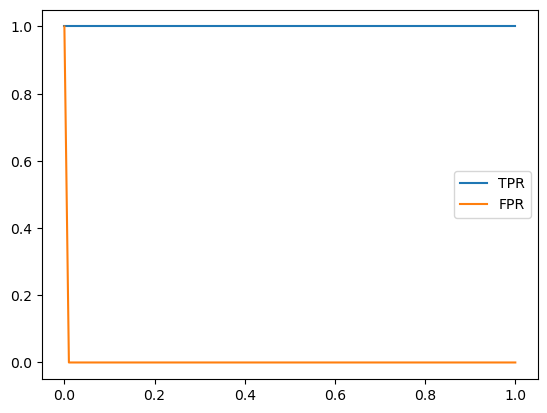

In [ ]:
plt.plot(df_scores.threshold, df_scores['tpr'], label='TPR')
plt.plot(df_scores.threshold, df_scores['fpr'], label='FPR')
plt.legend()